<a href="https://colab.research.google.com/github/jrl309/Financial-Modeling-Course/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:              Moves_BRL   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     115.5
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.39e-69
Time:                        01:42:25   Log-Likelihood:                 7093.7
No. Observations:                2250   AIC:                        -1.418e+04
Df Residuals:                    2246   BIC:                        -1.416e+04
Df Model:                           3                                         
Covariance Ty

<Figure size 2000x1000 with 0 Axes>

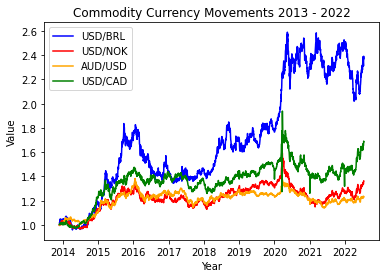

<Figure size 2000x1000 with 0 Axes>

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

 
brazil_data = yf.download("USDBRL=X", start = "2013-11-25" , end = "2022-07-15")
canada_data = yf.download("USDCAD=X", start = "2013-11-25" , end = "2022-07-15")
norway_data = yf.download("USDNOK=X", start = "2013-11-25" , end = "2022-07-15")
australia_data = yf.download("USDAUD=X", start = "2013-11-25" , end = "2022-07-15")
 
brazil_data["Moves_BRL"] = brazil_data["Adj Close"] / brazil_data["Adj Close"].shift(1)
canada_data["Moves_CAD"] = canada_data["Adj Close"] / canada_data["Adj Close"].shift(1)
norway_data["Moves_NOK"] = norway_data["Adj Close"] / norway_data["Adj Close"].shift(1)
australia_data["Moves_AUD"] = australia_data["Adj Close"] / australia_data["Adj Close"].shift(1)
 
merged_data = brazil_data[["Moves_BRL"]].join(canada_data[["Moves_CAD"]], how='inner')
merged_data = merged_data.join(norway_data[["Moves_NOK"]], how='inner')
merged_data = merged_data.join(australia_data[["Moves_AUD"]], how='inner')
merged_data.dropna(inplace=True)
 
Xdata = merged_data[["Moves_CAD", "Moves_NOK", "Moves_AUD"]]
Xdata = sm.add_constant(Xdata)
Ydata = merged_data["Moves_BRL"]
 
regresults = sm.OLS(Ydata, Xdata, missing = "drop").fit()
print(regresults.summary())

plt.plot(brazil_data["Moves_BRL"].cumprod(), color = "b")
plt.plot(australia_data["Moves_AUD"].cumprod(), color = "red")
plt.plot(canada_data["Moves_CAD"].cumprod(), color = "orange")
plt.plot(norway_data["Moves_NOK"].cumprod(), color = "g")

plt.title("Commodity Currency Movements 2013 - 2022")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(["USD/BRL", "USD/NOK", "AUD/USD", "USD/CAD"])


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 8.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   